## Подключаем все наши библиотеки и проверяем что они запускаются

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder


## Признаки:

* species - вид (нужно предсказать)
* island - остров
* bill_length_mm  - длина клюва
* bill_depth_mm - ширина клюва
* flipper_length_mm- длина ласт
* body_mass_g - масса
* sex - пол

### Загрузите набор данных

In [2]:
data = pd.read_csv('penguins.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


### Изучите значения признаков, отсутствующие значения, дубликаты. Дубликаты удалите

In [4]:
data.describe(include = 'O')

,species,island,sex
count,344,344,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,152,168,168


In [5]:
data.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
data[data['bill_length_mm'].isna()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
271,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [8]:
data = data.dropna(subset=["bill_length_mm"])

### Пропуски, которые можно заменить,  замените. Если пропуски останутся, то удалите строки с пропусками.

In [9]:
data['sex'] = data['sex'].fillna('female')

In [10]:
data.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [11]:
data = data.reset_index(drop=True)

In [12]:
data.shape

(342, 7)

In [13]:
data_number = data.select_dtypes(include=[np.number])
data_number.columns

Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], dtype='object')

### Замените категориальные признаки на числовые с помощью LabelEncoder (для целевого) и OrderEncoder (для нецелевых)

In [14]:
data_object = data.select_dtypes(include=['object'])
data_object.columns

Index(['species', 'island', 'sex'], dtype='object')

In [16]:
from sklearn.preprocessing import OrdinalEncoder

encoding = OrdinalEncoder()
columns = ['island', 'sex']
data[columns]= encoding.fit_transform(data[columns])

In [17]:
encoding.categories_

[array([0., 1., 2.]), array([0., 1.])]

In [18]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['species']= le.fit_transform(data['species'])

In [19]:
le.classes_

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

### Проведите нормализацию нецелевых признаков

In [20]:
y = data['species']
X = data.drop(['species'], axis=1)

In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler_mm = MinMaxScaler()
X_mm = scaler_mm.fit_transform(X)

In [22]:
from sklearn.preprocessing import StandardScaler

scaler_ss = StandardScaler()
X_ss = scaler_ss.fit_transform(X)

In [23]:
from sklearn.model_selection import train_test_split

X_mm_train, X_mm_test, y_mm_train, y_mm_test = train_test_split(X_mm, y, test_size = 0.2, random_state = 47)

In [24]:
X_ss_train, X_ss_test, y_ss_train, y_ss_test = train_test_split(X_ss, y, test_size = 0.2, random_state = 47)

### Проведите классификацию тремя разными методами с подбором гиперпараметров

#### SVM

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [25]:
from sklearn.svm import SVC

svc_clf = SVC()

In [28]:
parametrs_svc = { 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'] }
grid_svc = GridSearchCV(svc_clf, parametrs_svc)
grid_svc.fit(X_ss_train, y_ss_train)
grid_svc.best_params_

{'kernel': 'poly'}

In [29]:
svc_clf = SVC(kernel='poly')
svc_clf.fit(X_ss_train, y_ss_train)
y_pred_svc = svc_clf.predict(X_ss_test)

In [30]:
svc_clf.score(X_ss_test, y_ss_test)

0.9855072463768116

In [33]:
print(metrics.classification_report(y_ss_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        35
           1       1.00      0.93      0.96        14
           2       1.00      1.00      1.00        20

    accuracy                           0.99        69
   macro avg       0.99      0.98      0.98        69
weighted avg       0.99      0.99      0.99        69



<Axes: >

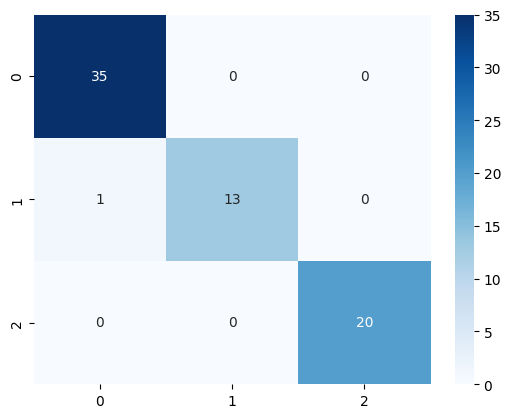

In [35]:
confusion_matrix(y_ss_test, y_pred_svc, labels=svc_clf.classes_)
sns.heatmap(confusion_matrix(y_ss_test, y_pred_svc, labels=svc_clf.classes_),
                cmap=plt.cm.Blues,
                annot=True)